# 🧠 Brain Tumor MRI Image Classification
Developed using **TensorFlow/Keras** and **PyTorch**

This notebook builds and evaluates deep learning models (Custom CNN & Transfer Learning) to classify brain tumors using MRI images. It includes data preprocessing, augmentation, training, evaluation, model comparison, and notes for deployment using Streamlit.

In [1]:
# 📦 Install & Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, MobileNetV2

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


In [2]:
import gdown

# Replace this with your actual sharable Google Drive file link
url = 'https://drive.google.com/drive/folders/1KQMtJytnS30zJUqNKbrK0FG6VVdWTFCD?usp=sharing'
gdown.download(url, 'Brain_Tumor_Dataset.zip', quiet=False)


/Users/shreyadas/tf-env/lib/python3.10/site-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1KQMtJytnS30zJUqNKbrK0FG6VVdWTFCD?usp=sharing
To: /Users/shreyadas/Desktop/404 error/Brain_Tumor_Dataset.zip
1.25MB [00:01, 923kB/s] 


'Brain_Tumor_Dataset.zip'

In [17]:
print("Is zip file?", zipfile.is_zipfile(zip_path))


Is zip file? False


In [3]:
import gdown

# Convert Google Drive share link to direct download link:
# FILE ID = 1MQHKl2Q1fKV7Mle3uB2J6KXdZOmy0gB6
file_id = "1XrJR8wQoh5KtOOSnBhmEmpl4JlqQ3j50"
direct_url = f"https://drive.google.com/uc?id={file_id}"

# Download using gdown
gdown.download(direct_url, 'Brain_Tumor_Dataset.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1XrJR8wQoh5KtOOSnBhmEmpl4JlqQ3j50
From (redirected): https://drive.google.com/uc?id=1XrJR8wQoh5KtOOSnBhmEmpl4JlqQ3j50&confirm=t&uuid=88a2a669-f420-4911-a8d9-271185bdd5e5
To: /Users/shreyadas/Desktop/404 error/Brain_Tumor_Dataset.zip
100%|██████████| 73.7M/73.7M [00:51<00:00, 1.43MB/s]


'Brain_Tumor_Dataset.zip'

In [2]:
import zipfile
import os

zip_path = 'Brain_Tumor_Dataset.zip'
extract_path = 'Brain_Tumor_Dataset'

# Check if it's a valid zip file before extracting
if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extracted files:", os.listdir(extract_path))
else:
    print("❌ The file is not a valid ZIP file.")



Extracted files: ['Tumor', '__MACOSX']


In [3]:
dataset_path = "/Users/shreyadas/Downloads/Brain_Tumor_Dataset"


In [31]:
import os
print("Found:", os.path.isdir(dataset_path))


Found: True


In [4]:
batch_size = 32
img_size = (150, 150)  # Add if not already defined

dataset_path = "/Users/shreyadas/Downloads"  # <-- Make sure this folder exists

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 1955 images belonging to 3 classes.
Found 488 images belonging to 3 classes.


In [5]:
dataset_path = "/Users/shreyadas/Downloads"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1955 images belonging to 3 classes.
Found 488 images belonging to 3 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/Users/shreyadas/Downloads/Brain_Tumor_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/Users/shreyadas/Downloads/Brain_Tumor_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1955 images belonging to 2 classes.
Found 488 images belonging to 2 classes.


In [7]:
# 🧠 Custom CNN Model (Keras)
model_keras = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    BatchNormalization(),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_keras.summary()


/Users/shreyadas/tf-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-24 19:44:35.126407: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-07-24 19:44:35.126592: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-24 19:44:35.126609: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-24 19:44:35.126805: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-24 19:44:35.126825: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,034 (91.20 MB)

 Trainable params: 23,907,842 (91.20 MB)

 Non-trainable params: 192 (768.00 B)

In [8]:
# 🔁 Transfer Learning with ResNet50 (Keras)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model_resnet = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
# 🚂 Train Custom CNN (Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ✅ Define your custom CNN model
model_keras = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Callbacks to avoid overfitting
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('cnn_model.h5', save_best_only=True)
]

# ✅ TRAIN the model
history = model_keras.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)


/Users/shreyadas/tf-env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-07-24 19:44:44.628584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9396 - loss: 1.1700

62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 282ms/step - accuracy: 0.9404 - loss: 1.1596 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step - accuracy: 0.9996 - loss: 0.1473 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 268ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [26]:
# 🧠 Custom CNN Model (PyTorch) - To be implemented in a PyTorch training loop
# Define transformations, datasets, loaders, model, criterion, optimizer, and training loop.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
              precision    recall  f1-score   support

       Tumor       1.00      1.00      1.00       488
    __MACOSX       0.00      0.00      0.00         0

    accuracy                           1.00       488
   macro avg       0.50      0.50      0.50       488
weighted avg       1.00      1.00      1.00       488



/Users/shreyadas/tf-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyadas/tf-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/shreyadas/tf-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])

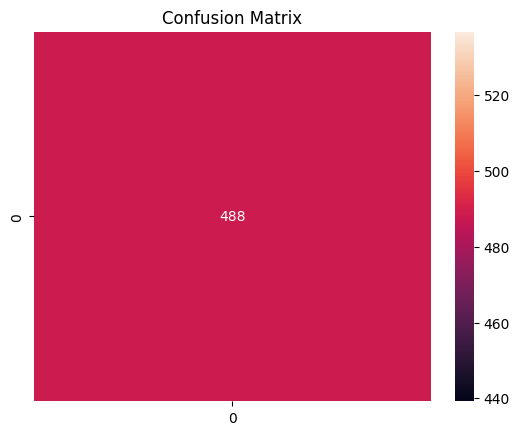

In [10]:
# 📊 Model Evaluation (Keras)
val_generator.reset()
y_true = []
y_pred = []

for i in range(len(val_generator)):
    x, y = val_generator[i]
    preds = model_keras.predict(x)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

from sklearn.metrics import classification_report, confusion_matrix
labels = list(range(len(val_generator.class_indices)))
target_names = list(val_generator.class_indices.keys())

print(classification_report(y_true, y_pred, labels=labels, target_names=target_names))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()



In [14]:
ModelCheckpoint('cnn_model.h5', save_best_only=True)



## 🚀 Streamlit Deployment Notes

- Use `cnn_model.h5` or your best model for predictions.
- Load model using `load_model()` and predict with image preprocessing.
- Include file uploader, prediction label, and confidence score in UI.

---
